In [7]:
!pip install pandas
!C:\Users\Dell\AppData\Local\Programs\Python\Python39\python.exe -m pip install scikit-learn
!pip install matplotlib
!pip show scikit-learn
!C:\Users\Dell\AppData\Local\Programs\Python\Python39\python.exe -m pip install seaborn


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


You should consider upgrading via the 'C:\Users\Dell\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Name: scikit-learn
Version: 1.7.2
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License-Expression: BSD-3-Clause
Location: C:\Users\Dell\Desktop\lol\Newenv\Lib\site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: 
  Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


You should consider upgrading via the 'C:\Users\Dell\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


Python executable: C:\Users\Dell\AppData\Local\Programs\Python\Python39\python.exe
Current working directory: C:\Users\Dell\Desktop\lol
Dataset loaded successfully!
Columns in dataset: ['Employee_ID', 'Age', 'Department', 'Years_of_Experience', 'Monthly_Working_Hours', 'Training_Hours_per_Year', 'Performance_Rating', 'Job_Satisfaction_Level', 'Promotion_in_Last_2_Years', 'Attrition']
  Employee_ID  Age  Department  Years_of_Experience  Monthly_Working_Hours  \
0       E1000   59       Sales                   27                    135   
1       E1001   49        Tech                   13                    132   
2       E1002   35  Operations                   16                    197   
3       E1003   28          HR                   23                    204   
4       E1004   41  Operations                   33                    192   

   Training_Hours_per_Year  Performance_Rating Job_Satisfaction_Level  \
0                       30                   3                 Medium  

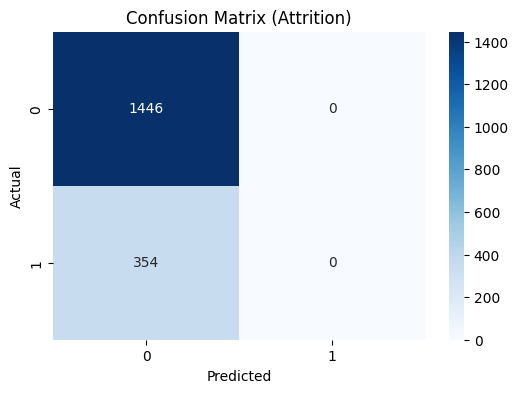

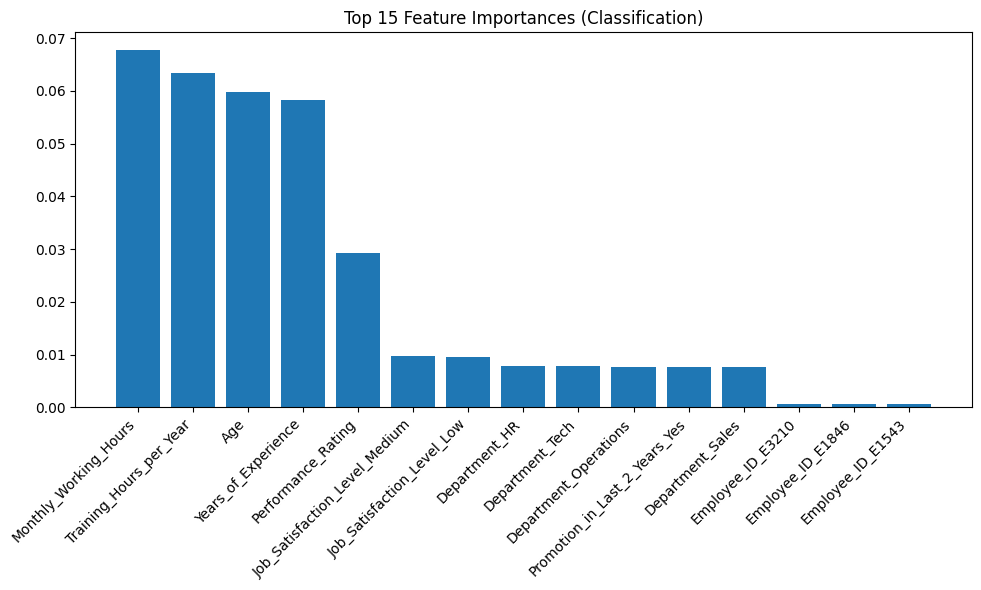

In [9]:
# Ensure plots render inside Jupyter
%matplotlib inline  

import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, classification_report,
    confusion_matrix, mean_squared_error, r2_score
)


print("Python executable:", sys.executable)
print("Current working directory:", os.getcwd())


file_path = 'Employee_Performance_Retention.csv'
try:
    df = pd.read_csv(file_path)
    print("Dataset loaded successfully!")
except FileNotFoundError:
    raise FileNotFoundError(f"File not found at path: {file_path}")

print("Columns in dataset:", df.columns.tolist())
print(df.head())


task = "classification" 


if task == "classification":

    if 'Attrition' not in df.columns:
        raise ValueError("Attrition column not found in dataset.")

    df = df.dropna(subset=['Attrition'])  # drop missing target


    df_encoded = pd.get_dummies(df.drop('Attrition', axis=1), drop_first=True)
    X = df_encoded
    y = df['Attrition'].astype('category').cat.codes  # categorical encoding

    print("Shape after encoding:", X.shape)
    print("Class distribution:\n", y.value_counts())


    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )


    rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced")
    rf.fit(X_train, y_train)


    y_pred = rf.predict(X_test)


    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    report = classification_report(y_test, y_pred, zero_division=0)

    print("\n===== Classification Results (Attrition) =====")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("Classification Report:\n", report)


    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=rf.classes_, yticklabels=rf.classes_)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix (Attrition)")
    plt.show()

elif task == "regression":

    if 'PerformanceRating' not in df.columns:
        raise ValueError("PerformanceRating column not found in dataset.")

    df = df.dropna(subset=['PerformanceRating'])  # drop missing target


    df_encoded = pd.get_dummies(df.drop('PerformanceRating', axis=1), drop_first=True)
    X = df_encoded
    y = df['PerformanceRating']  # keep numeric

    print("Shape after encoding:", X.shape)
    print("Target stats:\n", y.describe())


    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )


    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)


    y_pred = rf.predict(X_test)


    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print("\n===== Regression Results (PerformanceRating) =====")
    print("Mean Squared Error:", mse)
    print("R² Score:", r2)


importances = rf.feature_importances_
features = X.columns


top_n = 15
indices = importances.argsort()[::-1][:top_n]

plt.figure(figsize=(10,6))
plt.title(f"Top {top_n} Feature Importances ({task.title()})")
plt.bar(range(top_n), importances[indices], align='center')
plt.xticks(range(top_n), [features[i] for i in indices], rotation=45, ha="right")
plt.tight_layout()
plt.show()
